**Qu'est ce que le boosting ?**

C'est une méthode d"ensemble qui vise à créer un modèle fort à partir de plusieurs modèles plus faible. Concrètement, cela combine les prédictions de plusieurs modèles. Ces modèles sont de préférences simples et faibles. Dans le but d'améliorer la robustesse et la précision du modèle final.

**Comment cela fonctionne ?**

Contrairement au bagging, le boosting va se construire de manière itérative, séquentielle. En fait, chaque modèle va essayer de corriger les erreurs de modèle n-1.

A chaque itération, le boosting permet d'augmenter le poids des observations mal classées pour que le modèle suivant se concentre sur les cas difficiles. On peut voir cela comme une analyse qui augmente sa finesse au fur et à mesure, comme dans un entonnoir.

Pour cela, on va utiliser des modèles faibles ("Stumps",  des stumps c’est à dire des arbres qui ne font qu’une seule séparation, avec un seul noeud !). Concrètement, l'idée est de corriger progressivement au lieu d'utiliser un modèle de machine de guerre dès le départ.

**Il existe deux types de boosting**

- *AdaBoost(Adaptive Boosting)* 
- *Gradient Boosting*

Dans ce notebook nous allons nous intéresser au Gradient Boosting. Il permet d'améliorer les prédictions en utilisant la descente de gradient pour minimiser les erreurs.
Dans une autre partie du cours, nous verrons que nous pouvons utiliser *XGBoost, LightGBM et CatBoost* qui sont des variations avancées du gradient boosting.

**Quels sont les avantages du boosting ?**

- *Une précision plus grande et une bonne performance , autant sur des problèmes de classification que de régression.*

- *Il corrige les erreurs et réduit la variance , cela réduit le biais gràce à la combinaison de plusieurs modèles*

**Quels sont les limites ?**

- *Le boosting peut provoqué un over-fitting s'il n'est pas bien régulé.*
- *Il est sensible aux outliers*

***Le Gradient Boosting*** est une technique avancée qui va construire un modèle prédictif robuste via plusieurs modèles plus faibles. On va faire cela avec des **arbres de décisions**. C'est comme une extension du Boosting.

Donc on garde l'idée de base du Boosting et nous construirons des modèles de manières séquentielle (itératives) pour permettre la correction des erreurs par la somme des modèles précédents.

***C'est ici la principale différence***
Elle réside dans la façon dont les erreurs sont gérées. Comme son nom le suppose, on va utiliser la *descente de gradient* pour minimiser la fonction coût.





Renforcement de gradient : Simplification de la Régression Avancée

Le renforcement de gradient est une technique avancée pour améliorer les modèles de régression, une sorte de modèle statistique. Habituellement, quand on ajuste ces modèles, on utilise ce qu'on appelle l'algorithme de descente de gradient. Imaginez un paysage de collines et de vallées, où chaque point représente une combinaison possible de paramètres du modèle et son erreur associée. Le but est de trouver le point le plus bas de ce paysage, ce qui signifie qu'on a trouvé la meilleure combinaison de paramètres pour notre modèle.

Dans les méthodes classiques, comme la régression linéaire, les données utilisées pour construire le modèle ne changent pas, peu importe combien de fois on répète le processus. Mais le renforcement de gradient change la donne : il modifie les données à chaque étape pour améliorer le modèle.

Voici comment cela fonctionne : on commence par utiliser un arbre de décision, un type de modèle prédictif. Chaque fois qu'on utilise un arbre de décision, on regarde les erreurs (résidus) qu'il a faites. On utilise ensuite ces erreurs pour construire un nouvel arbre. On répète ce processus jusqu'à ce qu'on ne puisse plus améliorer le modèle. À la fin, on combine les prédictions de tous ces arbres pour obtenir le modèle final.

Cette méthode est très flexible. Elle peut s'adapter à différents types de fonctions d'erreur et de modèles, tant qu'on peut calculer comment l'erreur change avec les paramètres du modèle. Le plus souvent, on utilise des arbres de décision pour minimiser l'erreur résiduelle (dans les modèles de régression) ou l'erreur de classification (dans les modèles de classification).

Pour illustrer, prenons un exemple simple de régression en utilisant des arbres de décision. Cette approche est souvent appelée renforcement d'arbre par gradient, ou arbres de régression renforcés par gradient. On commence par ajuster un arbre de décision simple (DecisionTreeRegressor) sur nos données d'entraînement pour voir comment cela fonctionne.

In [37]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Maintenant, entraînez un second DecisionTreeRegressor sur les erreurs résiduelles commises par le premier

In [39]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

Ensuite, nous entraînons un troisième régresseur sur les erreurs résiduelles commises par le deuxième

In [40]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

Nous disposons maintenant d'un ensemble contenant trois arbres. Il peut faire des prédictions sur une nouvelle instance simplement en additionnant les prédictions de tous les arbres

In [41]:
X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

y_pred

array([0.75026781])


La figure ci-dessous illustre les prédictions de ces trois arbres dans la colonne de gauche, et les prédictions de l'ensemble dans la colonne de droite. Dans la première rangée, l'ensemble ne contient qu'un seul arbre, donc ses prédictions sont exactement les mêmes que celles du premier arbre. Dans la deuxième rangée, un nouvel arbre est entraîné sur les erreurs résiduelles du premier arbre. À droite, vous pouvez voir que les prédictions de l'ensemble correspondent à la somme des prédictions des deux premiers arbres. De manière similaire, dans la troisième rangée, un autre arbre est entraîné sur les erreurs résiduelles du deuxième arbre. Vous pouvez observer que les prédictions de l'ensemble s'améliorent progressivement à mesure que des arbres sont ajoutés à l'ensemble.

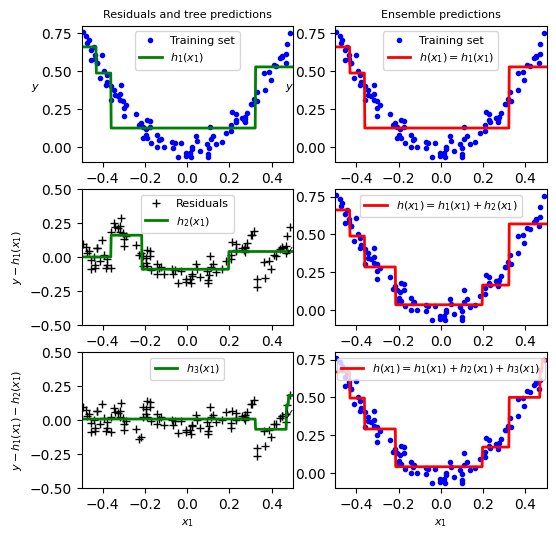

In [42]:
import matplotlib.pyplot as plt

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=8)
    plt.axis(axes)

plt.figure(figsize=(6,6))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=8, rotation=0)
plt.title("Residuals and tree predictions", fontsize=8)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=8, rotation=0)
plt.title("Ensemble predictions", fontsize=8)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=8)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=8, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=8)
plt.xlabel("$x_1$", fontsize=8)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=8)
plt.ylabel("$y$", fontsize=8, rotation=0)

#save_fig("gradient_boosting_plot")
plt.show()

***Voyons maintenant pour la classification***

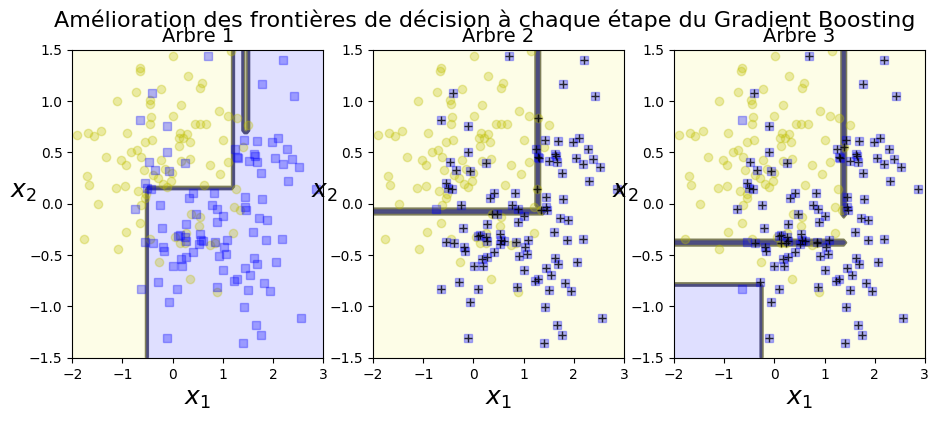

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Générer un nouvel ensemble de données de classification plus complexe
X, y = make_moons(n_samples=200, noise=0.5, random_state=53)

# Fonction pour tracer les frontières de décision et les erreurs
def plot_decision_boundary(clf, X, y, axes, alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

# Premier classificateur avec une profondeur d'arbre plus grande
tree_clf1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf1.fit(X, y)

# Préparer les données pour le second classificateur
y2 = np.where(tree_clf1.predict(X) == y, 0, 1)  # 0 si bien classé, 1 sinon

# Deuxième classificateur avec une profondeur d'arbre encore plus grande
tree_clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf2.fit(X, y2)

# Préparer les données pour le troisième classificateur
y3 = np.where(tree_clf2.predict(X) == y2, 0, 1)

# Troisième classificateur avec une profondeur d'arbre maximale
tree_clf3 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf3.fit(X, y3)

# Tracer les frontières de décision pour chaque classificateur
plt.figure(figsize=(11, 4))

for subplot, tree_clf in ((131, tree_clf1), (132, tree_clf2), (133, tree_clf3)):
    plt.subplot(subplot)
    plot_decision_boundary(tree_clf, X, y, axes=[-2, 3, -1.5, 1.5], alpha=0.3)
    if subplot > 131:  # Afficher les erreurs à partir du deuxième arbre
        errors = y != tree_clf.predict(X)
        plt.plot(X[:, 0][errors], X[:, 1][errors], "k+", alpha=0.8)
    plt.title(f"Arbre {subplot - 130}", fontsize=14)

plt.suptitle("Amélioration des frontières de décision à chaque étape du Gradient Boosting", fontsize=16)
plt.show()


Dans ces graphiques, les différences entre chaque étape du Gradient Boosting sont plus évidentes :

Le premier graphique montre la frontière de décision du premier arbre. Cet arbre a une profondeur de 3 et a appris directement à partir des données initiales.<br>
Le deuxième graphique illustre la frontière de décision du deuxième arbre, avec une profondeur de 4. Les croix noires indiquent les erreurs que le premier arbre n'a pas pu corriger. Ce deuxième arbre tente de corriger ces erreurs.<br>
Le troisième graphique présente la frontière de décision du troisième arbre, qui a une profondeur de 5. Il continue de travailler sur les erreurs laissées par le deuxième arbre (également marquées par des croix noires).<br>
Chaque arbre successif dans le Gradient Boosting essaie de corriger les erreurs des prédicteurs précédents, et avec des différences plus importantes entre les arbres (en termes de complexité et de profondeur), les ajustements deviennent plus évidents. Cela montre comment le Gradient Boosting améliore progressivement la classification en réduisant les erreurs étape par étape

***Hyper-paramètres Clés***<br><br>

**Learning Rate (taux d'apprentissage)**: Détermine le pas dans la mise à jour des poids. Des valeurs plus faibles nécessitent plus d'arbres, mais peuvent améliorer la performance.<br>
**N_estimators:** Nombre d'arbres à construire. Plus il y a d'arbres, plus le modèle est complexe.<br>
**Max_depth**: Profondeur maximale de chaque arbre. Une profondeur plus élevée augmente le risque de surajustement.<br>
**Min_samples_split**: Nombre minimum d'échantillons requis pour diviser un nœud interne.<br>
**Min_samples_leaf**: Nombre minimum d'échantillons requis pour être à un nœud feuille.<br><br>

**Gradient Boosting:**<br>
Préférable quand vous travaillez avec des ressources système limitées.<br>
Bon choix si la flexibilité et la facilité de compréhension sont prioritaires.<br>
Utile lorsque vous avez des ensembles de données de taille modérée et que vous ne nécessitez pas la rapidité de XGBoost.<br><br>



***Conseils Pratiques:***<br><br>
**Validation Croisée:** Utilisez la validation croisée pour évaluer la performance du modèle et le surajustement.<br>
**Tuning des Hyper-paramètres:** Utilisez des méthodes comme GridSearchCV ou RandomizedSearchCV pour optimiser les hyper-paramètres.<br>
**Feature Importance:** Analysez l'importance des caractéristiques pour comprendre votre modèle.<br>


Maintenant que vous avez une compréhension globale, appliquons ça sur le jeu de données du Titanic pour prédire la survie.

Note : Dans ce cas particulier et pour les besoins de cette étude de cas, nous pouvons utiliser la fonction dropna() pour simplement éliminer toutes les lignes incomplètes. Pour les besoins de cet exercice, nous les négligerons, mais évidemment, dans le monde réel, nous devons être beaucoup plus prudents et décider comment gérer les observations incomplètes.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

# Charger les données
data = pd.read_csv('titanic.csv')

# Prétraitement des données
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'].fillna('NA'))
data['embarked'] = label_encoder.fit_transform(data['embarked'].fillna('NA'))
data['age'] = data['age'].fillna(data['age'].median())
data['fare'] = data['fare'].fillna(data['fare'].median())

# Gérer les NaN dans 'pclass', 'sibsp', et 'parch'
data['pclass'] = data['pclass'].fillna(data['pclass'].median())
data['sibsp'] = data['sibsp'].fillna(data['sibsp'].median())
data['parch'] = data['parch'].fillna(data['parch'].median())

# Vérifier s'il reste des NaN
print("Valeurs NaN dans les caractéristiques:", data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].isnull().sum())

# Sélectionner les caractéristiques et la cible
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = data[features]
y = data[target].ffill()  # Remplacer les NaN dans la cible par la valeur précédente

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle et le GridSearch
gb_model = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_model.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres: ", grid_search.best_params_)
print("Meilleur score: ", grid_search.best_score_)


Valeurs NaN dans les caractéristiques: pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Vous devez allez voir la documentation du GradientBoost Classifier et jouer avec les hyperparamètres , vous n'avez pour le moment que les 3 principaux.